<a href="https://colab.research.google.com/github/Bhajji21/TimeSeries_Forecasting_Using_Auto_TimeSeries/blob/main/AV_TimeSeries_Hackthon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Connecting Colab to Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/AV_TimeSeries_Hackthon

/content/drive/MyDrive/Colab Notebooks/AV_TimeSeries_Hackthon


In [3]:
%ls

AV_Auto_TS.csv              AV_TimeSeries_Hackthon.ipynb   Test_0qrQsBZ.csv
AV_TimeSeries_Hackthon.csv  sample_submission_LSeus50.csv  Train_SU63ISt.csv


##Auto_TS Open Source Package

In [4]:
!pip3 install auto-ts
!pip install tscv

## Installing import packages

In [5]:
import pandas as pd
import numpy as np

In [6]:
#Auto_TS package
from auto_ts import auto_timeseries as ATS

Imported auto_timeseries version:0.0.29. Call by using:
model = auto_timeseries(score_type='rmse',
                time_interval='M',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                model_type=['best'],
                verbose=2)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [7]:
#path for dataset
datapath1 = "/content/drive/MyDrive/Colab Notebooks/AV_TimeSeries_Hackthon/Train_SU63ISt.csv"
datapath2 = "/content/drive/MyDrive/Colab Notebooks/AV_TimeSeries_Hackthon/Test_0qrQsBZ.csv"


##Preparing training dataset


In [8]:
#Preparing training dataset
data_train = pd.read_csv(datapath1,index_col=None)[:]
print(data_train.shape)
data_train.head(10)

(18288, 3)


,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
5,5,25-08-2012 05:00,2
6,6,25-08-2012 06:00,2
7,7,25-08-2012 07:00,2
8,8,25-08-2012 08:00,6
9,9,25-08-2012 09:00,2


##Preparing testing dataset


In [9]:
data_test = pd.read_csv(datapath2,index_col=None)[:]
print(data_test.shape)
data_test.head(10)

(5112, 2)


,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00
5,18293,26-09-2014 05:00
6,18294,26-09-2014 06:00
7,18295,26-09-2014 07:00
8,18296,26-09-2014 08:00
9,18297,26-09-2014 09:00


In [10]:
#creating copy of testing data
import copy
submission = copy.deepcopy(data_test)

In [11]:
timeseries_col = 'Datetime'
target_col = 'Count'

In [12]:
#variable declaration for Auto_TS model
score_type = 'rmse'
forecast_period = data_test.shape[0]
timeinterval = 'H'
non_seasonal_pdq = (2, 1, 2)
seasonality = True
seasonal_periods = 24
sep = ','

#Hint: 
In model_type, we can pass model_type=['Prophet', 'ML', 'SARIMAX'...] time series models.

In [13]:
Auto_TS_model = ATS(
            score_type=score_type, time_interval=timeinterval,
            non_seasonal_pdq=None, seasonality=True, seasonal_period=24,
            model_type=['Prophet','ML'], forecast_period=500,
            verbose=2)

Start of Fit.....
Running Augmented Dickey-Fuller test with paramters:
    maxlag: 2 regression: c autolag: None
Results of Augmented Dickey-Fuller Test:
+-----------------------------+------------------------------+
|                             | Dickey-Fuller Augmented Test |
+-----------------------------+------------------------------+
|        Test Statistic       |     -19.957655277459967      |
|           p-value           |             0.0              |
|          #Lags Used         |             2.0              |
| Number of Observations Used |           18285.0            |
|     Critical Value (1%)     |      -3.430707682157933      |
|     Critical Value (5%)     |      -2.861698082126097      |
|     Critical Value (10%)    |     -2.5668541429381015      |
+-----------------------------+------------------------------+
 this series is stationary
    Target variable given as = Count
Start of loading of data.....
Input is data frame. Performing Time Series Analysis
ts_col

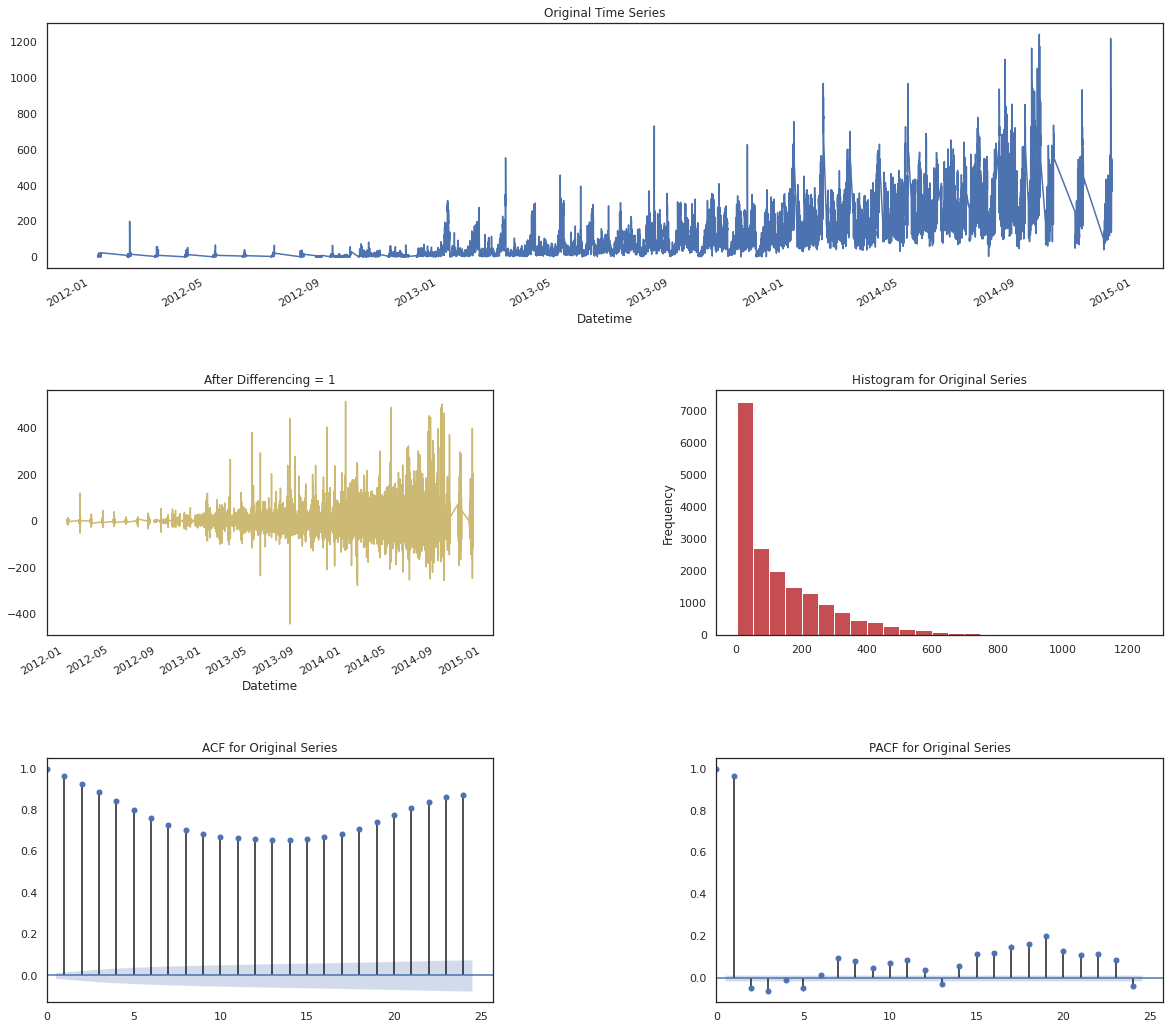

Time Interval is given as H
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...


INFO:numexpr.utils:NumExpr defaulting to 2 threads.


    Fit-Predict data (shape=(18288, 3)) with Confidence Interval = 0.95...
  Starting Prophet Fit
       Adding hourly seasonality to Prophet with period=24, fourier_order=5 and prior_scale=0.10
  End of Prophet Fit
NumObs: 18288
NFOLDS: 5
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5


Fold Number: 1 --> Train Shape: (15788, 3) Test Shape: (500, 3)
    RMSE = 129.74
    Std Deviation of Originals = 128.06
    Normalized RMSE = 101%
Cross Validation window: 1 completed


Fold Number: 2 --> Train Shape: (16288, 3) Test Shape: (500, 3)
    RMSE = 174.67
    Std Deviation of Originals = 138.56
    Normalized RMSE = 126%
Cross Validation window: 2 completed


Fold Number: 3 --> Train Shape: (16788, 3) Test Shape: (500, 3)
    RMSE = 208.56
    Std Deviation of Originals = 178.10
    Normalized RMSE = 117%
Cross Validation window: 3 completed


Fold Number: 4 --> Train Shape: (17288, 3) Test Shape: (500, 3)
    RMSE = 232.42
    Std Deviatio

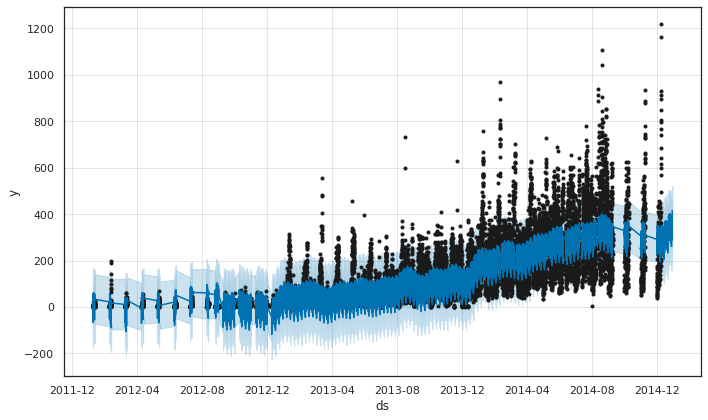

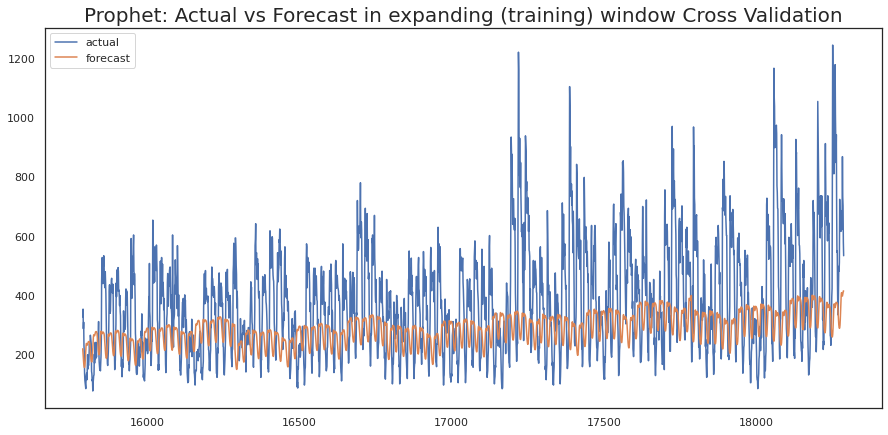

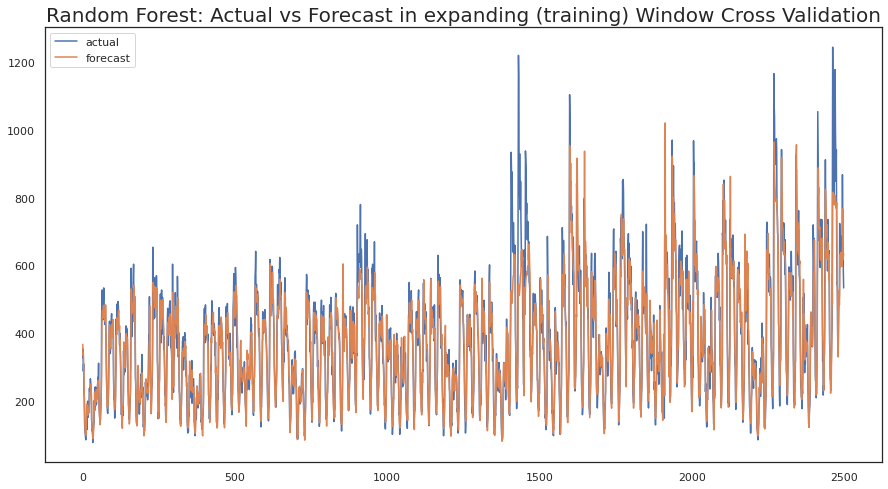

In [14]:
Auto_TS_model.fit(data_train, timeseries_col, target_col)

In [20]:
Auto_TS_model.get_leaderboard()

,name,rmse
1,ML,71.846671
0,Prophet,202.451355


In [21]:
Auto_TS_model.get_cv_scores()

,Model,CV Scores
0,Prophet,129.743405
1,Prophet,174.674168
2,Prophet,208.564841
3,Prophet,232.422160
4,Prophet,266.852201
5,ML,49.282416
6,ML,53.762813
7,ML,89.035745
8,ML,78.292472
9,ML,88.859909


##Hint
1. yhat is our predicted forecast
2. yhat_lower is the lower bound for our predictions
3. yhat_upper is the upper bound for our predictions.

##Prediction based on Prophet Model

In [22]:
#Prediction based on Prophet Model
prediction1 = Auto_TS_model.predict(testdata=data_test,model='Prophet',simple=False)
prediction1

Building Forecast dataframe. Forecast Period = 5112


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,ID,ID_lower,ID_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,hourly,hourly_lower,hourly_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-10 00:00:00,102.509774,257.397320,452.166803,102.509774,102.509774,264.685791,264.685791,264.685791,253.644509,253.644509,253.644509,5.316233,5.316233,5.316233,264.685791,264.685791,264.685791,5.625978,5.625978,5.625978,9.884079,9.884079,9.884079,-31.867572,-31.867572,-31.867572,0.0,0.0,0.0,356.154283
1,2014-01-10 01:00:00,102.517104,232.764665,419.691499,102.517104,102.517104,264.714361,264.714361,264.714361,230.835332,230.835332,230.835332,-17.122550,-17.122550,-17.122550,264.714361,264.714361,264.714361,5.484808,5.484808,5.484808,9.574637,9.574637,9.574637,-31.815925,-31.815925,-31.815925,0.0,0.0,0.0,333.352435
2,2014-01-10 02:00:00,102.524434,212.394669,411.653729,102.524434,102.524434,264.742931,264.742931,264.742931,207.832054,207.832054,207.832054,-39.711848,-39.711848,-39.711848,264.742931,264.742931,264.742931,5.335101,5.335101,5.335101,9.229835,9.229835,9.229835,-31.763965,-31.763965,-31.763965,0.0,0.0,0.0,310.356488
3,2014-01-10 03:00:00,102.531763,188.023934,383.577119,102.531763,102.531763,264.771501,264.771501,264.771501,189.844851,189.844851,189.844851,-57.240853,-57.240853,-57.240853,264.771501,264.771501,264.771501,5.177066,5.177066,5.177066,8.848833,8.848833,8.848833,-31.711696,-31.711696,-31.711696,0.0,0.0,0.0,292.376614
4,2014-01-10 04:00:00,102.539093,182.579308,384.079668,102.539093,102.539093,264.800071,264.800071,264.800071,178.237498,178.237498,178.237498,-68.345211,-68.345211,-68.345211,264.800071,264.800071,264.800071,5.010930,5.010930,5.010930,8.430831,8.430831,8.430831,-31.659122,-31.659122,-31.659122,0.0,0.0,0.0,280.776592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5107,2015-12-04 19:00:00,157.770026,491.802280,706.017326,111.845950,200.755303,397.564372,397.564372,397.564372,442.572889,442.572889,442.572889,38.772836,38.772836,38.772836,397.564372,397.564372,397.564372,2.476316,2.476316,2.476316,-2.621773,-2.621773,-2.621773,6.381137,6.381137,6.381137,0.0,0.0,0.0,600.342915
5108,2015-12-04 20:00:00,157.773217,487.443060,703.592038,111.842989,200.765972,397.592942,397.592942,397.592942,438.491552,438.491552,438.491552,35.520469,35.520469,35.520469,397.592942,397.592942,397.592942,2.616706,2.616706,2.616706,-3.676958,-3.676958,-3.676958,6.438392,6.438392,6.438392,0.0,0.0,0.0,596.264769
5109,2015-12-04 21:00:00,157.776408,486.677812,697.690348,111.840027,200.776641,397.621512,397.621512,397.621512,435.150582,435.150582,435.150582,33.041515,33.041515,33.041515,397.621512,397.621512,397.621512,2.759326,2.759326,2.759326,-4.767390,-4.767390,-4.767390,6.495619,6.495619,6.495619,0.0,0.0,0.0,592.926991
5110,2015-12-04 22:00:00,157.779600,481.428627,696.188888,111.837065,200.787715,397.650082,397.650082,397.650082,431.157162,431.157162,431.157162,29.941541,29.941541,29.941541,397.650082,397.650082,397.650082,2.903907,2.903907,2.903907,-5.891180,-5.891180,-5.891180,6.552812,6.552812,6.552812,0.0,0.0,0.0,588.936762


In [25]:
#Prediction based on Prophet Model for submission
prediction1_sub = Auto_TS_model.predict(testdata=data_test,model='Prophet',simple=False)['yhat_upper']
prediction1_sub

Building Forecast dataframe. Forecast Period = 5112


0       453.525677
1       420.626840
2       402.143938
3       382.244857
4       383.410361
           ...    
5107    702.652404
5108    705.276761
5109    700.895657
5110    693.386715
5111    679.259208
Name: yhat_upper, Length: 5112, dtype: float64

##Prediction based on ML Model

In [26]:
#Prediction based on Prophet Model
prediction2 = Auto_TS_model.predict(testdata=data_test,model='ML',simple=False)
prediction2

,yhat,mean_se,mean_ci_lower,mean_ci_upper
Datetime,,,,
26-09-2014 00:00,487.97,NaN,NaN,NaN
26-09-2014 01:00,384.89,NaN,NaN,NaN
26-09-2014 02:00,334.64,NaN,NaN,NaN
26-09-2014 03:00,279.79,NaN,NaN,NaN
26-09-2014 04:00,247.72,NaN,NaN,NaN
...,...,...,...,...
26-04-2015 19:00,324.34,NaN,NaN,NaN
26-04-2015 20:00,324.30,NaN,NaN,NaN
26-04-2015 21:00,313.04,NaN,NaN,NaN


In [27]:
#Prediction based on Prophet Model
prediction2_sub = Auto_TS_model.predict(testdata=data_test,model='ML',simple=False)['yhat']
prediction2_sub

Datetime
26-09-2014 00:00    487.97
26-09-2014 01:00    384.89
26-09-2014 02:00    334.64
26-09-2014 03:00    279.79
26-09-2014 04:00    247.72
                     ...  
26-04-2015 19:00    324.34
26-04-2015 20:00    324.30
26-04-2015 21:00    313.04
26-04-2015 22:00    314.23
26-04-2015 23:00    310.89
Name: yhat, Length: 5112, dtype: float64

##Prophet Model Prediction result

In [29]:
import copy
submission = pd.read_csv(datapath2,index_col=None)[:]
submission['Count'] = prediction1_sub.values.astype(int)
submission['ID'] = data_test['ID'].values
submission = submission.reset_index(drop=True)
submission.drop(timeseries_col, axis=1,inplace=True)
print(submission.shape)
submission.head(10)


(5112, 2)


,ID,Count
0,18288,453
1,18289,420
2,18290,402
3,18291,382
4,18292,383
5,18293,367
6,18294,366
7,18295,372
8,18296,400
9,18297,429


In [30]:
submission.to_csv('AV_TimeSeries_Hackthon_prophet.csv',index=False)

## ML Model Prediction Result

In [32]:
import copy
submission_ml = pd.read_csv(datapath2,index_col=None)[:]
submission_ml['Count'] = prediction2_sub.values.astype(int)
submission_ml['ID'] = data_test['ID'].values
submission_ml = submission_ml.reset_index(drop=True)
submission_ml.drop(timeseries_col, axis=1,inplace=True)
print(submission_ml.shape)
submission_ml.head(10)

(5112, 2)


,ID,Count
0,18288,487
1,18289,384
2,18290,334
3,18291,279
4,18292,247
5,18293,233
6,18294,239
7,18295,303
8,18296,359
9,18297,399


In [33]:
submission.to_csv('AV_TimeSeries_Hackthon_ml.csv',index=False)